In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import transpile 
from qiskit_aer import Aer
import numpy as np

# For a double controlled gate 

We used controlled rotation are performed with Hadamard and P gates.

Considering the external product of the matrices for H and P (unitary gates) for three qubits we have:

\begin{split} I \otimes I \otimes H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 &  1 & 0 &  0 & 0 &  0 & 0 &  0 \\
1 & -1 & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 1 &  1 & 0 &  0 & 0 &  0 \\
0 &  0 & 1 & -1 & 0 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 1 &  1 & 0 &  0 \\
0 &  0 & 0 &  0 & 1 & -1 & 0 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 1 &  1 \\
0 &  0 & 0 &  0 & 0 &  0 & 1 & -1 \\
\end{pmatrix} \end{split}



\begin{split} I \otimes I \otimes T =
\begin{pmatrix}
1 &  0 & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  e^{i \frac{\pi}{4}} & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 1 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 0 & e^{i \frac{\pi}{4}} & 0 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 1 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 0 & e^{i \frac{\pi}{4}} & 0 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 1 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 0 & e^{i \frac{\pi}{4}} \\
\end{pmatrix} \end{split}


\begin{split} I \otimes I \otimes T \dagger =
\begin{pmatrix}
1 &  0 & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  e^{-i \frac{\pi}{4}} & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 1 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 0 & e^{-i \frac{\pi}{4}} & 0 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 1 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 0 & e^{-i \frac{\pi}{4}} & 0 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 1 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 0 & e^{-i \frac{\pi}{4}} \\
\end{pmatrix}\end{split}


In the same way, we can calculate the matrices in each qubit and the controlled ones can be calculated, for example:

\begin{split} I \otimes CX =
\begin{pmatrix}
1 &  0 & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  1 & 0 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 0 &  1 & 0 &  0 & 0 &  0 \\
0 &  0 & 1 &  0 & 0 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 1 &  0 & 0 &  0 \\
0 &  0 & 0 &  0 & 0 &  1 & 0 &  0 \\
0 &  0 & 0 &  0 & 0 &  0 & 0 &  1 \\
0 &  0 & 0 &  0 & 0 &  0 & 1 &  0 \\
\end{pmatrix}\end{split}

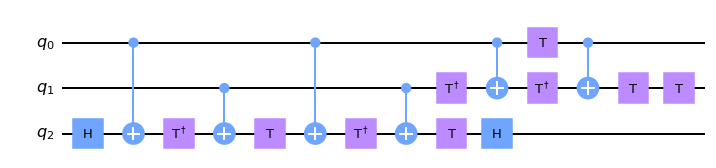

In [2]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(0,2)
qc.tdg(2)
qc.cx(1,2)
qc.t(2)
qc.cx(0,2)
qc.tdg(2)
qc.cx(1,2)
qc.t(2)
qc.h(2)

qc.tdg(1)
qc.cx(0,1)
qc.tdg(1)
qc.t(0)
qc.cx(0,1)
qc.t(1)
qc.t(1)
qc.draw('mpl')

In [3]:
backend = Aer.get_backend('unitary_simulator')
compilado = transpile(qc, backend)
job = backend.run(compilado) 
result = job.result().get_unitary(qc, decimals=3)
print(result)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            1.-0.j],
          [ 0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# Bibliography

Resumen de operaciones cuánticas — Documentación de Qiskit - 0.43.1. (s. f.). https://qiskit.org/documentation/locale/es_UN/tutorials/circuits/3_summary_of_quantum_operations.html

Gatti, L., García López de Lacalle, J., Buksman, E., & Fonseca de Oliveira, A. (2016). Conjuntos universales de compuertas para computación cuántica.
    

## Using U gate

Using only the U gate, the following angles are used:
To obtain the same result as the Hadamard ($\frac{\pi}{2}$,0,$ \pi $) is used.
$$
H = u(\pi/2,0,\pi)
$$ 

To obtain the same result ot the $T$  we used (0,0,$\frac{\pi}{4}$)

$$
T = u(0,0,\frac{\pi}{4})
$$

For $T\dagger$ we  only changes the sign of the angle

$$
T \dagger = u(0,0,\frac{-\pi}{4})
$$

In [4]:
def toffoli() -> QuantumCircuit:
    qr = QuantumRegister(3, "q")
    qc = QuantumCircuit(qr)
    qc.u(np.pi/2, 0, np.pi, qr[2])# H
    qc.cx(qr[0],qr[2])# CX
    qc.u(0, 0, -np.pi/4, qr[2])# T-1
    qc.cx(qr[1],qr[2])# CX
    qc.u(0, 0, np.pi/4, qr[2])# T
    qc.cx(qr[0],qr[2])# H
    qc.u(0, 0, -np.pi/4, qr[2])# T-1
    qc.cx(qr[1],qr[2])# CX
    qc.u(0, 0, np.pi/4, qr[2])# T
    qc.u(np.pi/2, 0, np.pi, qr[2])# H
    
    qc.u(0, 0, -np.pi/4, qr[1])# T-1    
    qc.cx(qr[0],qr[1])# CX       
    qc.u(0, 0, -np.pi/4, qr[1])# T-1
    qc.u(0, 0, np.pi/4, qr[0])# T    
    qc.cx(qr[0],qr[1])# CX            
    qc.u(0, 0, np.pi/4, qr[1])# T    
    qc.u(0, 0, np.pi/4, qr[1])# T
    
    return qc


Testing the decomposition of the gate

In [5]:
arreglo = ['000','001','010','011','100','101','110','111']

# The arrangement is traversed to test the combinations with 3 qubits
for dato in arreglo:
    #     The 3-qubit circuit is created
    qr = QuantumRegister(3, "q")
    qc = QuantumCircuit(qr)
    cont = 0
    
    #     It is initialized according to the array data
    for i in reversed(dato):
        if i == '1':
            qc.x(qr[cont])
        cont += 1

    #     The rotations instruction is added, which is equivalent to the CCX
    qc.append(toffoli(), [qr[2],qr[1],qr[0]])

    #     It is compiled to obtain the result and displayed on the screen
    backend = Aer.get_backend('statevector_simulator')
    compilado = transpile(qc, backend)
    job = backend.run(compilado) 
    result = job.result()
    counts = result.get_counts()
    
    print(dato,"-",counts)

000 - {'000': 1.000000000000001}
001 - {'001': 1.0}
010 - {'010': 1.000000000000001}
011 - {'011': 1.000000000000001}
100 - {'100': 1.000000000000001}
101 - {'101': 1.000000000000001}
110 - {'111': 1.0}
111 - {'110': 1.000000000000001}


## Multi-controlled gate
Generalizing the use of the previous gate, the same rotations are applied in a recursive function

In [6]:
#     Sequence of T rotations applied to the target qubit and the controlled gate
def rotaciones(numControl,total):
    qr = QuantumRegister(total+1, "q")
    qc = QuantumCircuit(qr)
    
    qc.u(0, 0, -np.pi/4, qr[total]) #T-1
    qc.cx(qr[numControl], qr[total]) #CX
    qc.u(0, 0, np.pi/4, qr[total]) #T #T-1
    
    return qc.to_instruction()

def cambioSigno(numControl,total):
    qr = QuantumRegister(total+1, "q")
    qc = QuantumCircuit(qr)
    
    qc.u(0, 0, -np.pi/4, qr[numControl])# T-1    
    qc.cx(qr[numControl-1],qr[numControl])# CX       
    qc.u(0, 0, -np.pi/4, qr[numControl])# T-1
    qc.u(0, 0, np.pi/4, qr[numControl-1])# T    
    qc.cx(qr[numControl-1],qr[numControl])# CX            
    qc.u(0, 0, np.pi/4, qr[numControl])# T    
    qc.u(0, 0, np.pi/4, qr[numControl])# T
    
    return qc.to_instruction()

#     Equivalent instruction for Hadamard gate
def Haddamard(total):
    qr = QuantumRegister(total+1, "q")
    qc = QuantumCircuit(qr)
    
    qc.u(np.pi/2, 0, np.pi, qr[total]) #H
    
    return qc.to_instruction()

#     Recursive statement to apply the controls
def multiControlGeneral(numControl,total) -> QuantumCircuit:
    #     Define the circuit
    qr = QuantumRegister(total+1, "q")
    qc = QuantumCircuit(qr)
    
    #     Define the arrangement of the control qubits
    qubitControl = []
    for j in range(total+1):
        qubitControl.append(qr[j])

    #     If only one control is missing, the CX is applied
    if numControl == 1:
        qc.cx(qr[0],qr[total])#t,C
    else:
        #     One is reduced to the control number and the Hadamard gates, control,
        #  and rotations, recursion is applied here 
        numControl -= 1

        qc.append(Haddamard(total),qubitControl)
        
        qc.append(multiControlGeneral(numControl,total),qubitControl)
        qc.append(rotaciones(numControl,total),qubitControl)        
        qc.append(multiControlGeneral(numControl,total),qubitControl)
        qc.append(rotaciones(numControl,total),qubitControl)
        
        qc.append(Haddamard(total),qubitControl)
        
        qc.append(cambioSigno(numControl,total),qubitControl)
        
        
    return qc.to_instruction()

Testing the matrix with multicontrols

In [7]:
dato = '00000'
qr = QuantumRegister(5, "q")
qc = QuantumCircuit(qr)

cont = 0
for i in reversed(dato):
    if i == '1':
        qc.x(qr[cont])
    cont += 1
    
qubitControl = []
for j in range(4,-1,-1):
    qubitControl.append(qr[j])

qc.append(multiControlGeneral(4,4), qubitControl)
backend = Aer.get_backend('unitary_simulator')
compilado = transpile(qc, backend)
job = backend.run(compilado) 
result = job.result().get_unitary(qc, decimals=3)
print(result)

Operator([[ 1.+0.j, -0.-0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.-0.j,  1.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.-0.j,  1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  1.-0.j,  0.+0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))


Trying different arrangements for use on multiple controls

In [8]:
# arreglo = ['00','01','10','11']
# arreglo = ['000','001','010','011','100','101','110','111']
# arreglo = ['0000','0001','0010','0011','0100','0101','0110','0111',
#            '1000','1001','1010','1011','1100','1101','1110','1111']
arreglo = ['00000','00001','00010','00011','00100','00101','00110','00111',
           '01000','01001','01010','01011','01100','01101','01110','01111',
           '10000','10001','10010','10011','10100','10101','10110','10111',
           '11000','11001','11010','11011','11100','11101','11110','11111']

# Se recorre el arreglo para probar las combinaciones con n qubits
for dato in arreglo:
    #     Se cea el circuito del numero de controles + 1 qubits
    numControl = 4
    qr = QuantumRegister(numControl+1, "q")
    qc = QuantumCircuit(qr)
    
    #     Se inicializa de acuerdo con el dato del arreglo
    cont = 0
    for i in reversed(dato):
        if i == '1':
            qc.x(qr[cont])
        cont += 1
    
    qubitControl = []
    for j in range(numControl,-1,-1):
        qubitControl.append(qr[j])

    #     Se agrega la instruccion recursiva con el numero de contrles
    qc.append(multiControlGeneral(numControl,numControl), qubitControl)

    #     Se compila para obtener el resultado y se muestra en pantalla
    backend = Aer.get_backend('statevector_simulator')
    compilado = transpile(qc, backend)
    job = backend.run(compilado, shots=1024) 
    result = job.result()
    counts = result.get_counts()
    
    print(dato,"-",counts)


00000 - {'00000': 1.000000000000004}
00001 - {'00001': 1.000000000000003}
00010 - {'00010': 1.000000000000004}
00011 - {'00011': 1.000000000000004}
00100 - {'00100': 1.000000000000004}
00101 - {'00101': 1.000000000000003}
00110 - {'00110': 1.000000000000004}
00111 - {'00111': 1.000000000000003}
01000 - {'01000': 1.000000000000004}
01001 - {'01001': 1.000000000000004}
01010 - {'01010': 1.000000000000004}
01011 - {'01011': 1.000000000000004}
01100 - {'01100': 1.000000000000006}
01101 - {'01101': 1.000000000000004}
01110 - {'01110': 1.000000000000004}
01111 - {'01111': 1.000000000000004}
10000 - {'10000': 1.000000000000004}
10001 - {'10001': 1.000000000000004}
10010 - {'10010': 1.000000000000004}
10011 - {'10011': 1.000000000000004}
10100 - {'10100': 1.000000000000006}
10101 - {'10101': 1.000000000000004}
10110 - {'10110': 1.000000000000004}
10111 - {'10111': 1.000000000000003}
11000 - {'11000': 1.000000000000004}
11001 - {'11001': 1.000000000000004}
11010 - {'11010': 1.000000000000004}
1